In [1]:
import sys
sys.path.append("code")

# %load_ext autoreload

In [42]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice

from datetime import datetime
import glob
import itertools

In [ ]:
from simulation_tools import read_simulation_results
from plotting import format_plot, save_plot

# Paneling algorithm

Comparison of Wetterer's staggered panel distribution and Saff's spiraling panel distribution

In [65]:
df_spiraling = read_simulation_results(f"../results/spiraling_vs_staggered/spiraling/lro_dependent_variable_history.csv")
df_spiraling

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,panels_ill_moon,panels_vis_ill_moon,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
2010-06-26 06:01:06.184231680,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,33,33,3.308041e+08,1.794980e+06,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,9.853265e-10
2010-06-26 06:01:16.184257792,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,34,34,3.308041e+08,1.794880e+06,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,8.758443e-10
2010-06-26 06:01:26.184243968,162402.450080,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,34,34,3.308041e+08,1.794780e+06,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,7.744810e-10
2010-06-26 06:01:36.184270080,178670.014833,-5355.549851,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,35,35,3.308041e+08,1.794679e+06,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,7.230555e-10
2010-06-26 06:01:46.184256000,194922.381410,-3189.787751,-1.783957e+06,1624.430796,216.595313,187.336947,1.787235e+06,0.007410,1.554782,0.701525,...,32,32,3.308041e+08,1.794577e+06,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,7.207429e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:25:26.184238592,22597.092554,-29416.191651,-1.796482e+06,1633.021241,215.420618,27.774968,1.787305e+06,0.008442,1.552923,0.703062,...,34,34,3.308379e+08,1.796865e+06,1.524594e+11,1.518128,0.000012,6.732255e-08,6.776676e-08,6.060738e-10
2010-06-26 15:25:36.184264704,38926.114683,-27260.752734,-1.796128e+06,1632.760132,215.664088,42.952959,1.787304e+06,0.008440,1.552923,0.703298,...,34,34,3.308379e+08,1.796757e+06,1.524594e+11,1.518297,0.000012,6.731700e-08,6.776221e-08,6.561751e-10
2010-06-26 15:25:46.184250624,55251.834119,-25102.971469,-1.795623e+06,1632.360699,215.889089,58.129920,1.787302e+06,0.008439,1.552923,0.703576,...,32,32,3.308379e+08,1.796648e+06,1.524594e+11,1.518467,0.000012,6.731144e-08,6.775759e-08,7.390753e-10
2010-06-26 15:25:56.184236800,71572.867469,-22943.032355,-1.794966e+06,1631.822906,216.095672,73.304563,1.787299e+06,0.008439,1.552922,0.703899,...,32,32,3.308380e+08,1.796539e+06,1.524594e+11,1.518635,0.000012,6.730590e-08,6.775291e-08,8.510681e-10


In [66]:
df_staggered = read_simulation_results(f"../results/spiraling_vs_staggered/staggered/lro_dependent_variable_history.csv")
df_staggered

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,panels_ill_moon,panels_vis_ill_moon,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
2010-06-26 06:01:06.184231680,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,31,31,3.308041e+08,1.794980e+06,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,7.954054e-10
2010-06-26 06:01:16.184257792,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,31,31,3.308041e+08,1.794880e+06,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,8.489854e-10
2010-06-26 06:01:26.184243968,162402.450080,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,31,31,3.308041e+08,1.794780e+06,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,9.309905e-10
2010-06-26 06:01:36.184270080,178670.014833,-5355.549851,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,32,32,3.308041e+08,1.794679e+06,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,1.012092e-09
2010-06-26 06:01:46.184256000,194922.381410,-3189.787751,-1.783957e+06,1624.430796,216.595313,187.336947,1.787235e+06,0.007410,1.554782,0.701525,...,33,33,3.308041e+08,1.794577e+06,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,1.058583e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:25:26.184238592,22597.092187,-29416.190887,-1.796482e+06,1633.021241,215.420618,27.774968,1.787305e+06,0.008442,1.552923,0.703062,...,32,32,3.308379e+08,1.796865e+06,1.524594e+11,1.518128,0.000012,6.732255e-08,6.776676e-08,7.629346e-10
2010-06-26 15:25:36.184264704,38926.114316,-27260.751970,-1.796128e+06,1632.760132,215.664087,42.952958,1.787304e+06,0.008440,1.552923,0.703298,...,32,32,3.308379e+08,1.796757e+06,1.524594e+11,1.518297,0.000012,6.731700e-08,6.776221e-08,7.452356e-10
2010-06-26 15:25:46.184250624,55251.833752,-25102.970705,-1.795623e+06,1632.360699,215.889089,58.129920,1.787302e+06,0.008439,1.552923,0.703576,...,32,32,3.308379e+08,1.796648e+06,1.524594e+11,1.518467,0.000012,6.731144e-08,6.775759e-08,7.655160e-10
2010-06-26 15:25:56.184236800,71572.867102,-22943.031592,-1.794966e+06,1631.822906,216.095672,73.304562,1.787299e+06,0.008439,1.552922,0.703899,...,33,33,3.308380e+08,1.796539e+06,1.524594e+11,1.518635,0.000012,6.730590e-08,6.775291e-08,7.964484e-10


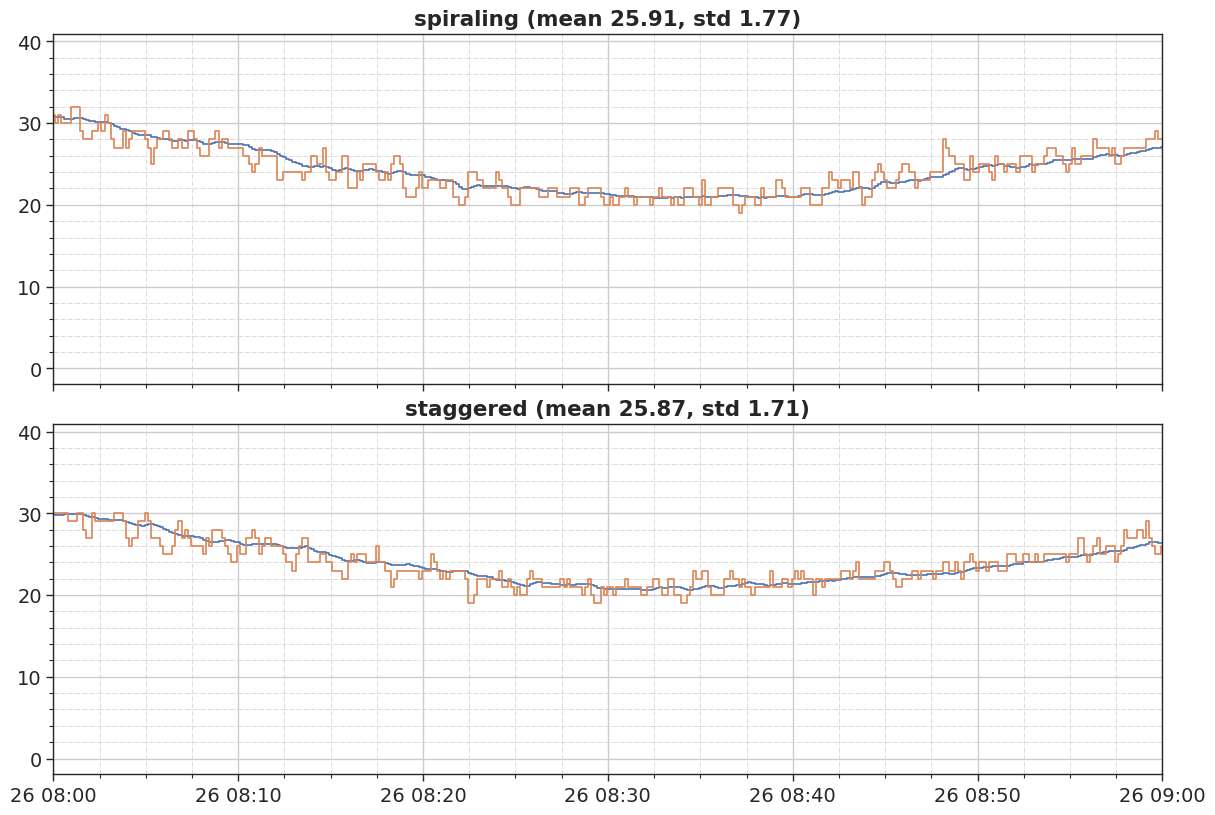

In [85]:
def plot_spiraling_vs_staggered(df_spiraling, df_staggered):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[12, 8], sharex="all")

    df_spiraling = df_spiraling.copy()
    df_spiraling["panels_vis_ill_moon_mean"] = df_spiraling["panels_vis_ill_moon"].rolling(20).mean()
    df_spiraling["panels_vis_ill_moon_var"] = df_spiraling["panels_vis_ill_moon"] - df_spiraling["panels_vis_ill_moon_mean"]
    ax1.step(df_spiraling.index, df_spiraling["panels_vis_ill_moon_mean"])
    ax1.step(df_spiraling.index, df_spiraling["panels_vis_ill_moon"])
    ax1.set_title(f"spiraling (mean {df_spiraling['panels_vis_ill_moon'].mean():.2f}, std {df_spiraling['panels_vis_ill_moon_var'].std():.2f})")

    df_staggered = df_staggered.copy()
    df_staggered["panels_vis_ill_moon_mean"] = df_staggered["panels_vis_ill_moon"].rolling(20).mean()
    df_staggered["panels_vis_ill_moon_var"] = df_staggered["panels_vis_ill_moon"] - df_staggered["panels_vis_ill_moon_mean"]
    ax2.step(df_staggered.index, df_staggered["panels_vis_ill_moon_mean"])
    ax2.step(df_staggered.index, df_staggered["panels_vis_ill_moon"])
    ax2.set_title(f"staggered (mean {df_staggered['panels_vis_ill_moon'].mean():.2f}, std {df_staggered['panels_vis_ill_moon_var'].std():.2f})")

    plt.xlim(datetime(2010, 6, 26, 8, 0), datetime(2010, 6, 26, 9, 0))

    format_plot()

plot_spiraling_vs_staggered(df_spiraling, df_staggered)

As expected, the more evenly spaced staggered panels provide (slightly) more consistent coverage than the spiraling panels, although slightly more spiraling panels are visible on average.

# Number of panels

In [46]:
df_few = read_simulation_results(f"../results/2k_vs_20k/2k/lro_dependent_variable_history.csv")
df_few

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,panels_ill_moon,panels_vis_ill_moon,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
2010-06-26 06:01:06.184231680,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,31,31,3.308041e+08,1.794980e+06,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,7.954054e-10
2010-06-26 06:01:16.184257792,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,31,31,3.308041e+08,1.794880e+06,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,8.489854e-10
2010-06-26 06:01:26.184243968,162402.450080,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,31,31,3.308041e+08,1.794780e+06,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,9.309905e-10
2010-06-26 06:01:36.184270080,178670.014833,-5355.549851,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,32,32,3.308041e+08,1.794679e+06,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,1.012092e-09
2010-06-26 06:01:46.184256000,194922.381410,-3189.787751,-1.783957e+06,1624.430796,216.595313,187.336947,1.787235e+06,0.007410,1.554782,0.701525,...,33,33,3.308041e+08,1.794577e+06,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,1.058583e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:25:26.184238592,22597.092187,-29416.190887,-1.796482e+06,1633.021241,215.420618,27.774968,1.787305e+06,0.008442,1.552923,0.703062,...,32,32,3.308379e+08,1.796865e+06,1.524594e+11,1.518128,0.000012,6.732255e-08,6.776676e-08,7.629346e-10
2010-06-26 15:25:36.184264704,38926.114316,-27260.751970,-1.796128e+06,1632.760132,215.664087,42.952958,1.787304e+06,0.008440,1.552923,0.703298,...,32,32,3.308379e+08,1.796757e+06,1.524594e+11,1.518297,0.000012,6.731700e-08,6.776221e-08,7.452356e-10
2010-06-26 15:25:46.184250624,55251.833752,-25102.970705,-1.795623e+06,1632.360699,215.889089,58.129920,1.787302e+06,0.008439,1.552923,0.703576,...,32,32,3.308379e+08,1.796648e+06,1.524594e+11,1.518467,0.000012,6.731144e-08,6.775759e-08,7.655160e-10
2010-06-26 15:25:56.184236800,71572.867102,-22943.031592,-1.794966e+06,1631.822906,216.095672,73.304562,1.787299e+06,0.008439,1.552922,0.703899,...,33,33,3.308380e+08,1.796539e+06,1.524594e+11,1.518635,0.000012,6.730590e-08,6.775291e-08,7.964484e-10


In [47]:
df_many = read_simulation_results(f"../results/2k_vs_20k/20k/lro_dependent_variable_history.csv")
df_many

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,panels_ill_moon,panels_vis_ill_moon,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
2010-06-26 06:01:06.184231680,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,322,322,3.308041e+08,1.794980e+06,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,8.500782e-10
2010-06-26 06:01:16.184257792,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,321,321,3.308041e+08,1.794880e+06,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,8.587307e-10
2010-06-26 06:01:26.184243968,162402.450080,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,319,319,3.308041e+08,1.794780e+06,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,8.681584e-10
2010-06-26 06:01:36.184270080,178670.014833,-5355.549851,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,320,320,3.308041e+08,1.794679e+06,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,8.772036e-10
2010-06-26 06:01:46.184256000,194922.381410,-3189.787751,-1.783957e+06,1624.430796,216.595313,187.336947,1.787235e+06,0.007410,1.554782,0.701525,...,322,322,3.308041e+08,1.794577e+06,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,8.872716e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 08:49:56.184244736,-96799.255941,17318.932660,1.777057e+06,-1647.074723,-217.767988,-77.171507,1.787240e+06,0.007524,1.554037,0.634843,...,239,239,3.308142e+08,1.779776e+06,1.524569e+11,1.547048,0.000012,6.667501e-08,6.775013e-08,1.263518e-09
2010-06-26 08:50:06.184271104,-113265.566372,15140.546060,1.776208e+06,-1646.163534,-217.906199,-92.614009,1.787243e+06,0.007528,1.554037,0.634718,...,238,238,3.308142e+08,1.779880e+06,1.524569e+11,1.546937,0.000012,6.667757e-08,6.774694e-08,1.247446e-09
2010-06-26 08:50:16.184257024,-129722.049412,12960.871701,1.775205e+06,-1645.109181,-218.025506,-108.046434,1.787245e+06,0.007532,1.554038,0.634600,...,241,241,3.308142e+08,1.779985e+06,1.524569e+11,1.546818,0.000012,6.668020e-08,6.774339e-08,1.218232e-09
2010-06-26 08:50:26.184242944,-146167.271671,10780.099586,1.774047e+06,-1643.911341,-218.125721,-123.467110,1.787246e+06,0.007536,1.554038,0.634410,...,240,240,3.308142e+08,1.780091e+06,1.524569e+11,1.546651,0.000012,6.668290e-08,6.774004e-08,1.205593e-09


In [48]:
n_steps = min(len(df_few.index), len(df_many.index)) - 1
final_pos1 = df_few.iloc[n_steps][pos_names].to_numpy()
final_pos2 = df_many.iloc[n_steps][pos_names].to_numpy()
final_pos_diff = np.linalg.norm(final_pos1 - final_pos2)
final_pos_diff_rel = final_pos_diff / np.linalg.norm(final_pos1)
print(f"% difference of final position: {final_pos_diff_rel:.10%}")

% difference of final position: 0.0000000062%


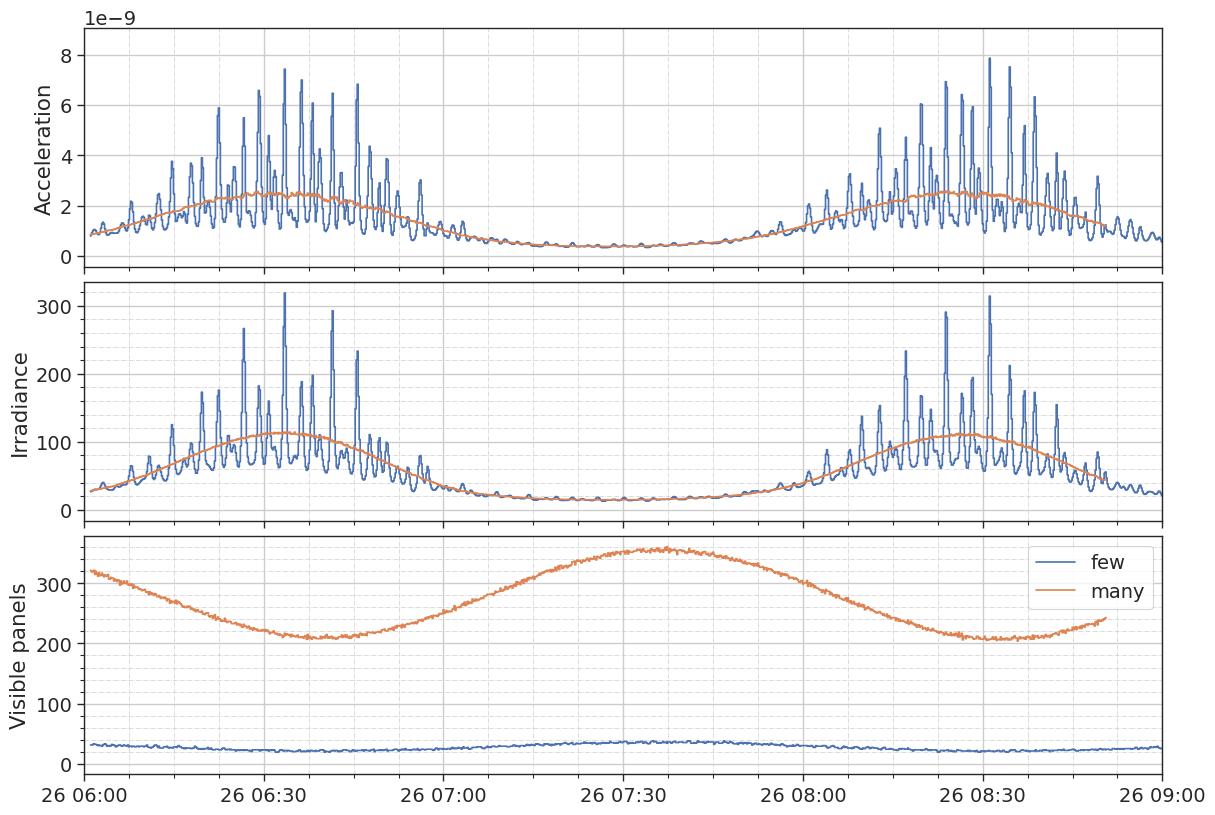

In [117]:
def plot_few_vs_many(df_few, df_many):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[12, 8], sharex="all")

    ax1.step(df_few.index, df_few["acc_rp_moon"], label="few")
    ax1.step(df_many.index, df_many["acc_rp_moon"], label="many")
    ax1.set_ylabel("Acceleration")

    ax2.step(df_few.index, df_few["irr_moon"], label="few")
    ax2.step(df_many.index, df_many["irr_moon"], label="many")
    ax2.set_ylabel("Irradiance")

    ax3.step(df_few.index, df_few["panels_vis_ill_moon"], label="few")
    ax3.step(df_many.index, df_many["panels_vis_ill_moon"], label="many")
    ax3.set_ylabel("Visible panels")
    
    # plt.xlim(datetime(2010, 6, 26, 8, 20), datetime(2010, 6, 26, 8, 40))
    # plt.xlim(datetime(2010, 6, 26, 7, 20), datetime(2010, 6, 26, 7, 40))
    plt.xlim(datetime(2010, 6, 26, 6), datetime(2010, 6, 26, 9))
    # ax3.set_ylim(18, 28)
    # ax3.set_ylim(200, 230)
    plt.legend()

    format_plot()

plot_few_vs_many(df_few, df_many)

* Significantly less noise when 30+ panels are visible
* When more panels are visible, irradiance received by LRO is lower; this is only coincidental
* Number of visible panels varies because altitude of LRO varies between 40 km and 65 km
* Irradiance varies because sun is not perfectly perpendicular to orbit (beta angle about 80 deg)

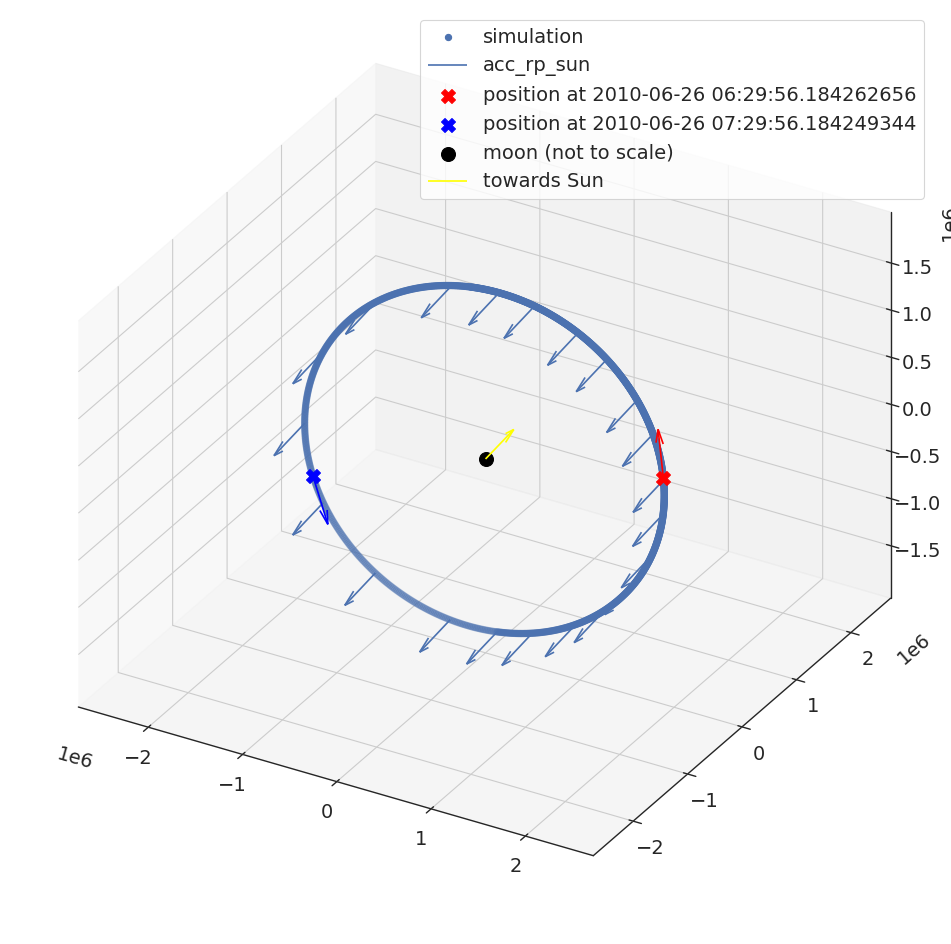

In [131]:
def plot_orbit_3d(df_ephemeris, df_simulation):
    def do_plot_with_acc(df, label, acc_name):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
        df = df.iloc[::int(len(df.index) / 20)]
        acc = df[[f"{acc_name}_x", f"{acc_name}_y", f"{acc_name}_z"]]
        acc /= abs(acc.mean().mean())
        ax.quiver(df["pos_x"], df["pos_y"], df["pos_z"],
                  acc[f"{acc_name}_x"], acc[f"{acc_name}_y"], acc[f"{acc_name}_z"], length=2e5, zorder=-1, label=acc_name)
    
    def do_plot_pos_at_time(time, color="black"):
        ts = pd.to_datetime(time)
        nearest_ts = df_simulation.index[df_simulation.index.get_indexer([ts], method='nearest')][0]
        df_pos = df_simulation.loc[nearest_ts]
        ax.quiver(df_pos["pos_x"], df_pos["pos_y"], df_pos["pos_z"], df_pos["vel_x"], df_pos["vel_y"], df_pos["vel_z"], color=color, length=5e5, normalize=True)
        ax.scatter(df_pos["pos_x"], df_pos["pos_y"], df_pos["pos_z"], c=color, marker="X", s=100, label=f"position at {nearest_ts}", zorder=5)
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection='3d', proj_type="ortho", computed_zorder=False)
    
    do_plot_with_acc(df_simulation, "simulation", "acc_rp_sun")
    
    do_plot_pos_at_time("2010-06-26 06:30", "red")
    do_plot_pos_at_time("2010-06-26 07:30", "blue")
    
    ax.scatter(0, 0, 0, c="black", s=100, label="moon (not to scale)")
    
    pos_sun_init = df_simulation[["pos_sun_x", "pos_sun_y", "pos_sun_z"]].iloc[0] / df_simulation["r_sun"].iloc[0]
    ax.quiver(0, 0, 0, *pos_sun_init, length=6e5, color="yellow", label="towards Sun")
    
    ax.set_aspect("equal")
    # ax.view_init(90, -90)
    # ax.view_init(0, -90)
    
    plt.legend()

df_ephemeris = generate_lro_ephemeris(df_many["t_et"])

plot_orbit_3d(df_ephemeris, df_many)